# Kriging in python

Here, ordinary kriging using the geostat package is illustrated.

In [1]:
import numpy as np
import geostat as geo
import matplotlib.pyplot as plt

A data set

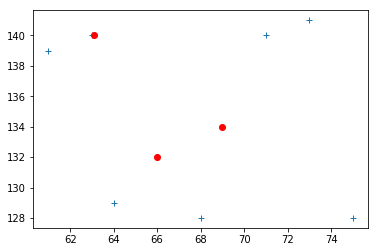

In [12]:
# Input data: the measurements
x1 = np.array( [61,63,64,68,71,73,75] )        # Locations of the points (x1=x, x2=y)
x2 = np.array( [139,140,129,128,140,141,128] )  
v = np.array( [477,96,227,646,606,791,783] )   # Value of the measurements 

# The data in matrix form = one line per data point
x = np.transpose( (x1,x2) )

# The locations where we want to estimate 
x10 = np.array([63.1, 66, 69]); 
x20 = np.array([140, 132, 134]);
xu = np.transpose( (x10,x20) )

# Plot the data for visual check
plt.plot(x1,x2,'+');   # Position des points
plt.plot(x10,x20,'or') # Point où l'on veut estimer
plt.show()

## Kriging using the geostat module



In [15]:
# Defines the type of covariance function and parameters
import geostat as geo
covar = geo.covariance(rang=30, sill=20, typ="spherical")
vo,so = geo.ordinary_kriging_covariance(x,v,xu,covar)
print(vo)
print(so)

[[ 102.36352305]
 [ 395.41363864]
 [ 526.231114  ]]
[[ 39.78788501]
 [ 33.88010645]
 [ 32.17473703]]


In [16]:

vario = geo.variogram(rang=30, sill=20, typ="spherical")
vo,so = geo.ordinary_kriging_variogram(x,v,xu,vario)
print(vo)
print(so)


[[ 102.70760736]
 [ 400.38896026]
 [ 529.99471018]]
[[   3.94873012]
 [  87.85744942]
 [ 111.39842006]]


In [5]:
xu.shape=(2,1)
np.concatenate((x,xu),axis=1)

array([[  9.7,  47.6,  18.8],
       [ 43.8,  24.6,  67.9]])